# Table of Contents

- [Table of Content](#table-of-content)
- [0-General](#0-general)
  - [0-Introduction](#0-introduction)
  - [0-Objective](#0-objective)
  - [0-Analysis](#0-analysis)
  - [0-Data Dictionary](#0-data-dictionary)
  - [0-Acknowledgements](#0-acknowledgements)


# 0-General
[Back to Table of Contents](#table-of-contents)

## Evaluating the Feasibility of Using Trained Dogs to Detect Lung Cancer from Patient-Worn Masks


## 0-Introduction
[Back to Table of Contents](#table-of-contents)

This project investigates the feasibility of using trained detection dogs to identify lung cancer based on scent samples collected via patient-worn masks. Prior research suggests that dogs are capable of detecting disease-related volatile organic compounds (VOCs). The dataset includes detailed records of testing sessions, mask conditions, dog-specific responses, and contextual variables (e.g., mood, weather), which will be analyzed to assess both the accuracy and influencing factors of detection performance.


## 0-Objectives
[Back to Table of Contents](#table-of-contents)

1. **Primary Objective**:  
   Assess the diagnostic accuracy of trained dogs in identifying lung cancer from patient-worn masks.
2. **Secondary Objective**:  
   Identify variables that influence detection performance, including dog mood, handler mood, and environmental conditions (e.g., weather, temperature).
3. **Exploratory Objective**:  
   Conduct a sensitivity analysis to examine whether diagnostic accuracy declines when fewer dogs are involved in a testing setup.


## 0-Analysis Plan
[Back to Table of Contents](#table-of-contents)




## 0-Data Dictionary
[Back to Table of Content](#table-of-content)

## Data Dictionary
| Column Name                      | Description                                                                 |
|-----------------------------------|-----------------------------------------------------------------------------|



## 0-Acknowledgements
[Back to Table of Content](#table-of-contents)

XXX

## 1-Beginnings
[Back to Table of Contents](#table-of-contents)


In [33]:
# Data handling and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# File and system access
import os

# Statistical analysis
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Evaluation metrics
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc,
    precision_score, recall_score, accuracy_score
)
from collections import Counter

# Modeling and preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Visualization aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [34]:
# Define the working directory
working_directory = "/Users/stevenschepanski/Documents/04_ANALYSIS/DogScan/data"
os.chdir(working_directory)

# Define the file path
file_name = "df_full.csv"

In [35]:
# Load the data into a DataFrame
complete_data = pd.read_csv(file_name, low_memory=False)

# Quick check
print(complete_data.shape)
complete_data.head()

(59500, 20)


,facility_number,board_number,Dog,is_positive_board,Date_x,True_positive_mask,Donor_ID,Mask_worn_on,Dog_response_to_mask,Decoy_mask,Dog_response_to_decoy,Notes,Date_y,Weather,Temperature,Supervisor,Total_number_search_boards,Total_number_positive_masks,Dog_mood,diagnostic_outcome
0,1,1,Aaron,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN
1,1,2,Aaron,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN
2,1,3,Aaron,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN
3,1,4,Aaron,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN
4,1,5,Aaron,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN


# Analysis
## Data Cleaning and Preprocessing
[Back to Table of Contents](#table-of-contents)

In [36]:
# Overview of the dataset
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59500 entries, 0 to 59499
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   facility_number              59500 non-null  int64  
 1   board_number                 59500 non-null  int64  
 2   Dog                          59500 non-null  object 
 3   is_positive_board            59500 non-null  bool   
 4   Date_x                       3096 non-null   object 
 5   True_positive_mask           2960 non-null   float64
 6   Donor_ID                     2960 non-null   object 
 7   Mask_worn_on                 2960 non-null   object 
 8   Dog_response_to_mask         2960 non-null   float64
 9   Decoy_mask                   136 non-null    object 
 10  Dog_response_to_decoy        132 non-null    float64
 11  Notes                        4 non-null      object 
 12  Date_y                       3096 non-null   object 
 13  Weather         

- Total rows: 59,500 (matches the information from DogScan GmBH)
- Most behavioral/response columns have ~2960 non-null entries
- Variable types are int64, object, bool, and float64 which likely needs to be adjusted

In [37]:
# Check for missing values (absolute and %)
missing_counts = complete_data.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_counts / len(complete_data) * 100).round(2)

# Combine into one summary table
missing_summary = pd.DataFrame({
    "Missing Values": missing_counts,
    "% Missing": missing_percent
})

# Display the missing data summary
print(missing_summary)

display(missing_summary.head(10))

                             Missing Values  % Missing
Notes                                 59496      99.99
Dog_response_to_decoy                 59368      99.78
Decoy_mask                            59364      99.77
True_positive_mask                    56540      95.03
Donor_ID                              56540      95.03
Mask_worn_on                          56540      95.03
Dog_response_to_mask                  56540      95.03
Supervisor                            56404      94.80
Dog_mood                              56404      94.80
Total_number_positive_masks           56404      94.80
Date_x                                56404      94.80
Total_number_search_boards            56404      94.80
Date_y                                56404      94.80
Weather                               56404      94.80
Temperature                           56404      94.80
facility_number                           0       0.00
board_number                              0       0.00
is_positiv

,Missing Values,% Missing
Notes,59496,99.99
Dog_response_to_decoy,59368,99.78
Decoy_mask,59364,99.77
True_positive_mask,56540,95.03
Donor_ID,56540,95.03
Mask_worn_on,56540,95.03
Dog_response_to_mask,56540,95.03
Supervisor,56404,94.80
Dog_mood,56404,94.80
Total_number_positive_masks,56404,94.80


| Variable                                                                                                                            | Missing (%) | Interpretation                                                                                                                                                                                   |
| ----------------------------------------------------------------------------------------------------------------------------------- | ----------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| `Notes`                                                                                                                             | 99.99%      | This field is almost entirely empty and likely not useful for analysis unless selectively populated in later rows. It may be removed or ignored in modeling.                                     |
| `Dog_response_to_decoy`                                                                                                             | 99.78%      | This variable only applies to **negative boards**, which are underrepresented in the original Excel file. The high missing rate is expected due to reconstructed TNs without dog responses.      |
| `Decoy_mask`                                                                                                                        | 99.77%      | Same as above: present only for decoy trials. Missingness reflects the unrecorded negatives.                                                                                                     |
| `True_positive_mask`, `Donor_ID`, `Mask_worn_on`, `Dog_response_to_mask`                                                            | \~95%       | These variables are specific to **positive mask trials**, explaining their absence for the majority of rows representing negative boards.                                                        |
| `Supervisor`, `Dog_mood`, `Total_number_positive_masks`, `Date_x`, `Date_y`, `Total_number_search_boards`, `Weather`, `Temperature` | \~94.8%     | These are facility-level metadata only available for observed rows from the original dataset. The missingness here reflects the reconstructed TN rows (which had no direct metadata originally). |
| `facility_number`, `board_number`, `is_positive_board`, `Dog`, `diagnostic_outcome`                                                 | 0%          | These are core variables created during preprocessing and fully populated for all sniffing trials. No missingness here indicates successful reconstruction of the full trial-level dataset.      |


In [38]:
# Keep Date_y if it’s more complete, or rename as needed
complete_data["Date"] = complete_data["Date_y"]

# Drop the now redundant date columns
complete_data.drop(columns=["Date_x", "Date_y"], inplace=True)

In [39]:
# Convert date fields to datetime objects
complete_data["Date"] = pd.to_datetime(complete_data["Date"], errors="coerce")
complete_data["Mask_worn_on"] = pd.to_datetime(complete_data["Mask_worn_on"], errors="coerce")


In [40]:
# Define columns that are categorical
categorical_columns = [
    "Dog", "Donor_ID", "Weather", "Supervisor", "Dog_mood", "diagnostic_outcome"
]

# Apply categorical conversion
complete_data[categorical_columns] = complete_data[categorical_columns].astype("category")

In [41]:
# Force string/numeric values, coerce errors into NaN
complete_data["Dog_response_to_decoy"] = pd.to_numeric(complete_data["Dog_response_to_decoy"], errors="coerce")
complete_data["Dog_response_to_mask"] = pd.to_numeric(complete_data["Dog_response_to_mask"], errors="coerce")
complete_data["True_positive_mask"] = pd.to_numeric(complete_data["True_positive_mask"], errors="coerce")

## Descriptive Statistics
[Back to Table of Contents](#table-of-contents)

In [42]:
# Print dataset dimensions
print("Rows:", complete_data.shape[0])  # Total sniffing events
print("Columns:", complete_data.shape[1])  # Total features

# Overview of variable types in the dataset
# Note: If duplicated category lines appear, use .apply(lambda x: x.name) for cleaner count
print(complete_data.dtypes.apply(lambda x: x.name).value_counts())


Rows: 59500
Columns: 19
category          6
float64           6
int64             2
datetime64[ns]    2
object            2
bool              1
Name: count, dtype: int64


The final dataset consists of 59,500 rows and 19 columns. These represent individual sniffing events (i.e., dog × board × facility). The variables include numerical (e.g., temperature), categorical (e.g., dog name, supervisor), boolean flags (e.g., `is_positive_board`), and timestamp information (e.g., test date, mask worn date). The distribution of variable types is well balanced for mixed-methods analysis, with 6 category, 6 float64, 2 int64, 2 datetime, 2 objects and 1 bool.

In [43]:
# Count number of trials per dog
dog_counts = complete_data["Dog"].value_counts()

# Create summary table with count and percent of total
dog_summary = pd.DataFrame({
    "N Trials": dog_counts,
    "Percent": (dog_counts / len(complete_data) * 100).round(2)
})

# Display the dog-level summary
print(dog_summary)

       N Trials  Percent
Dog                     
Aaron     11900     20.0
Aki       11900     20.0
Biest     11900     20.0
Loki      11900     20.0
Lu        11900     20.0


In [44]:
# Crosstab of outcomes per dog
outcome_by_dog = pd.crosstab(complete_data["Dog"], complete_data["diagnostic_outcome"])
print(outcome_by_dog)

diagnostic_outcome  FN  FP     TN   TP
Dog                                   
Aaron               17  26  11282  575
Aki                 15  31  11277  577
Biest               20  19  11289  572
Loki                12  30  11278  580
Lu                  19  26  11282  573


Each of the five trained dogs (**Aaron**, **Aki**, **Biest**, **Loki**, and **Lu**) contributed exactly **11,900 sniffing trials**, representing **20% each** of the total dataset. This **balanced allocation** ensures comparability across dogs and supports fair subgroup analyses of individual diagnostic performance.

A breakdown of the diagnostic outcomes per dog reveals a **high consistency in exposure to positive and negative cases**, with only minor variations in the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). For instance:

- True negatives range from **11,277 to 11,289**
- True positives range from **572 to 580**
- False positives range from **19 to 31**
- False negatives range from **12 to 20**

This distribution confirms that all dogs were exposed to a **comparable mix of trial types**, making observed performance differences interpretable as likely due to behavior or sensitivity rather than sampling bias.

In [45]:
# Drop rows with missing Weather or Date (to avoid NaT)
weather_day_counts = (
    complete_data.dropna(subset=["Weather", "Date"])
    .drop_duplicates(subset=["Date", "Weather"])  # ensure one count per weather per day
    .groupby("Weather")
    .size()
    .sort_values(ascending=False)
)

# Drop rows with missing Supervisor or Date
supervisor_day_counts = (
    complete_data.dropna(subset=["Supervisor", "Date"])
    .drop_duplicates(subset=["Date", "Supervisor"])
    .groupby("Supervisor")
    .size()
    .sort_values(ascending=False)
)

print("Unique weather conditions by date:\n", weather_day_counts)
print("\nUnique supervisors by date:\n", supervisor_day_counts)


Unique weather conditions by date:
 Weather
🌧️ regnerisch    68
☀️ sonnig        37
⛅️ bewölkt       20
dtype: int64

Unique supervisors by date:
 Supervisor
person1     55
person4     20
person3     17
person2      9
person6      7
person10     4
person7      4
person9      4
person8      3
person5      2
dtype: int64


Weather and supervisor data were consistently available for each recorded test day and were reconstructed to match the unique session metadata for all trials. Aggregating by testing day revealed that scent detection sessions took place under a range of weather conditions:

- Rainy (🌧️ regnerisch) on 68 days,
- Sunny (☀️ sonnig) on 37 days, and
- Cloudy (⛅️ bewölkt) on 20 days.

This distribution reflects a broad ecological validity of testing conditions, including adverse weather scenarios.

The sessions were supervised by 10 different individuals, with Supervisor 1 overseeing the majority of test days (55 out of 125 total dates). Other supervisors contributed to a smaller number of sessions, ranging from 2 to 20 days each. This variation offers potential for moderator analyses but also ensures that the overall diagnostic results are not attributable to a single handler's influence.

In [46]:
# Summary statistics for temperature (rounded to 2 decimal places)
temp_stats = complete_data["Temperature"].describe().round(2)
print(temp_stats)

count    3096.00
mean       15.35
std         7.86
min         0.00
25%         8.00
50%        16.00
75%        22.00
max        34.00
Name: Temperature, dtype: float64


Reported ambient temperatures during testing sessions ranged from **0 °C to 34 °C**, with a **median of 16 °C**. The **mean was 15.35 °C (SD = 7.86)**, indicating generally moderate testing conditions. However, some sessions occurred in both colder and warmer environments.

These temperature values may serve as important **environmental covariates** when evaluating dog performance, particularly if olfactory sensitivity varies with ambient temperature.

In [47]:
# Frequency of dog mood states, including missing values
print(complete_data["Dog_mood"].value_counts(dropna=False))

Dog_mood
NaN              56404
ausgeglichen      2661
motiviert          262
übermotiviert      173
Name: count, dtype: int64


Dog mood was missing in **56,404 cases**, again due to artificial row expansion during the reconstruction of true negatives. Among the **3,096 recorded entries**, the following mood states were documented:

- **Ausgeglichen** ("balanced"): *n = 2,661*
- **Motiviert** ("motivated"): *n = 262*
- **Übermotiviert** ("overmotivated"): *n = 173*

These states may reflect varying levels of **internal arousal** and **task engagement**, and should be considered as potential covariates in performance modeling.

Like weather and supervisor data, **missing dog mood entries can be reliably inferred** based on combinations of `Dog` and `Date`, as these values are constant within a testing session.

In [48]:
# Summary statistics of the number of unique search boards per facility
board_stats = complete_data.groupby("facility_number")["board_number"].nunique().describe().round(2)
print(board_stats)

count    125.00
mean      95.20
std       38.98
min       25.00
25%       75.00
50%      100.00
75%      125.00
max      200.00
Name: board_number, dtype: float64


Across the 125 facilities included in the dataset, the number of search boards ranged from **25 to 200**, with a **median of 100** boards. On average, each facility used **95.2 boards (SD = 39.0)**.

This substantial variability in testing volume suggests differences in **operational complexity and workload** across facilities. Such variation should be considered in any **facility-level** or **fatigue-sensitive** analyses, as higher board counts may influence error rates or dog performance under extended sessions.

## Data Imputation
[Back to Table of Contents](#table-of-contents)

In [49]:
# Impute 'Weather' and 'Supervisor' using facility_number
# Build a lookup table for each facility_number, taking the first observed (non-missing) entry for Weather and Supervisor
# Assumption: Weather and Supervisor were constant within each facility-day, so taking the first is safe
weather_supervisor_lookup = (
    complete_data
    .dropna(subset=["Weather", "Supervisor"])  # keep only rows with both values
    .groupby("facility_number")[["Weather", "Supervisor"]]
    .first()  # select the first valid row per facility
)

# Use the lookup table to fill missing 'Weather' values by facility
complete_data["Weather"] = complete_data["Weather"].fillna(
    complete_data["facility_number"].map(weather_supervisor_lookup["Weather"])
)

# Do the same for 'Supervisor'
complete_data["Supervisor"] = complete_data["Supervisor"].fillna(
    complete_data["facility_number"].map(weather_supervisor_lookup["Supervisor"])
)

In [50]:
# Impute 'Dog_mood' using facility_number + Dog combination
# Build a lookup table for Dog mood based on both facility and dog
# Assumption: Within a facility-day, each dog had a consistent mood entry (only one observation per dog per session)
mood_lookup = (
    complete_data
    .dropna(subset=["Dog_mood"])  # keep only non-missing mood entries
    .groupby(["facility_number", "Dog"])["Dog_mood"]
    .first()  # again, use the first valid entry
)

In [51]:
# Define a function to apply row-wise: if Dog_mood is missing, try to impute using the lookup table
def fill_mood(row):
    if pd.isna(row["Dog_mood"]):
        return mood_lookup.get((row["facility_number"], row["Dog"]), pd.NA)  # fallback is pd.NA if no match found
    return row["Dog_mood"]  # keep original if not missing

In [52]:
# Apply imputation function to each row (row-wise)
complete_data["Dog_mood"] = complete_data.apply(fill_mood, axis=1)

In [53]:
# Verify imputation results
print("Remaining missing values after imputation:")
print(complete_data[["Weather", "Supervisor", "Dog_mood"]].isnull().sum())

Remaining missing values after imputation:
Weather       0
Supervisor    0
Dog_mood      0
dtype: int64


In [90]:
# show the variable "Dog_response_to_mask" in complete_data
print(complete_data["Dog_response_to_mask"].value_counts(dropna=False))

Dog_response_to_mask
NaN    56540
1.0     2877
0.0       83
Name: count, dtype: int64


We now filled all missing entries in `Weather`, `Supervisor`, and `Dog_mood` based on consistent within-session values. This is statistically justifiable, because each facility-day was a well-logged testing session with consistent environment and handler/dog conditions.

## Goal 1.1: Calculation of diagnostic accuracy metrics per dog and across all dogs combined.

In [62]:
# Function to calculate metrics
def calculate_metrics(tp, tn, fp, fn):
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan
    specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
    ppv = tp / (tp + fp) if (tp + fp) > 0 else np.nan
    npv = tn / (tn + fn) if (tn + fn) > 0 else np.nan
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    return pd.Series({
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "PPV": ppv,
        "NPV": npv,
        "Accuracy": accuracy,
        "TP": tp, "TN": tn, "FP": fp, "FN": fn
    })

In [63]:
# Function to calculate confidence intervals for all metrics
def calculate_confidence_intervals(tp, tn, fp, fn, alpha=0.05):
    # Use Wilson intervals for proportions
    sens_ci = proportion_confint(tp, tp + fn, alpha=alpha, method='wilson') if (tp + fn) > 0 else (np.nan, np.nan)
    spec_ci = proportion_confint(tn, tn + fp, alpha=alpha, method='wilson') if (tn + fp) > 0 else (np.nan, np.nan)
    ppv_ci  = proportion_confint(tp, tp + fp, alpha=alpha, method='wilson') if (tp + fp) > 0 else (np.nan, np.nan)
    npv_ci  = proportion_confint(tn, tn + fn, alpha=alpha, method='wilson') if (tn + fn) > 0 else (np.nan, np.nan)
    acc_total = tp + tn + fp + fn
    acc_ci = proportion_confint(tp + tn, acc_total, alpha=alpha, method='wilson') if acc_total > 0 else (np.nan, np.nan)

    return pd.Series({
        "Sens_Low95": round(sens_ci[0], 3), "Sens_High95": round(sens_ci[1], 3),
        "Spec_Low95": round(spec_ci[0], 3), "Spec_High95": round(spec_ci[1], 3),
        "PPV_Low95":  round(ppv_ci[0], 3),  "PPV_High95":  round(ppv_ci[1], 3),
        "NPV_Low95":  round(npv_ci[0], 3),  "NPV_High95":  round(npv_ci[1], 3),
        "Acc_Low95":  round(acc_ci[0], 3),  "Acc_High95":  round(acc_ci[1], 3)
    })

In [64]:
# Create outcome table per dog
outcome_counts = complete_data.groupby("Dog")["diagnostic_outcome"].value_counts().unstack().fillna(0)

In [65]:
# Compute metrics for each dog
dog_metrics = outcome_counts.apply(
    lambda row: calculate_metrics(row.get("TP", 0), row.get("TN", 0), row.get("FP", 0), row.get("FN", 0)),
    axis=1
)

In [66]:
# Compute overall totals
overall_counts = complete_data["diagnostic_outcome"].value_counts()
overall_metrics = calculate_metrics(
    tp=overall_counts.get("TP", 0),
    tn=overall_counts.get("TN", 0),
    fp=overall_counts.get("FP", 0),
    fn=overall_counts.get("FN", 0)
).rename("All Dogs")

In [67]:
# Convert overall_metrics (Series) to DataFrame with same structure
overall_df = overall_metrics.to_frame().T
overall_df.index = ["All Dogs"]

In [68]:
# Combine per-dog and overall metrics
summary_metrics = pd.concat([dog_metrics, overall_df])

In [69]:
# Reorder columns and round to 3 decimals
summary_metrics = summary_metrics.round(3)
summary_metrics = summary_metrics[["TP", "FN", "FP", "TN", "Sensitivity", "Specificity", "PPV", "NPV", "Accuracy"]]


In [70]:
# Calculate all CIs
cis = summary_metrics.apply(
    lambda row: calculate_confidence_intervals(row["TP"], row["TN"], row["FP"], row["FN"]),
    axis=1
)

In [72]:
# Combine results
summary_with_cis = pd.concat([summary_metrics, cis], axis=1)

# Print the final result
print("Summary Metrics per Dog and Overall:")
summary_with_cis

Summary Metrics per Dog and Overall:


,TP,FN,FP,TN,Sensitivity,Specificity,PPV,NPV,Accuracy,Sens_Low95,Sens_High95,Spec_Low95,Spec_High95,PPV_Low95,PPV_High95,NPV_Low95,NPV_High95,Acc_Low95,Acc_High95
Aaron,575.0,17.0,26.0,11282.0,0.971,0.998,0.957,0.998,0.996,0.954,0.982,0.997,0.998,0.937,0.970,0.998,0.999,0.995,0.997
Aki,577.0,15.0,31.0,11277.0,0.975,0.997,0.949,0.999,0.996,0.959,0.985,0.996,0.998,0.929,0.964,0.998,0.999,0.995,0.997
Biest,572.0,20.0,19.0,11289.0,0.966,0.998,0.968,0.998,0.997,0.948,0.978,0.997,0.999,0.950,0.979,0.997,0.999,0.996,0.998
Loki,580.0,12.0,30.0,11278.0,0.980,0.997,0.951,0.999,0.996,0.965,0.988,0.996,0.998,0.931,0.965,0.998,0.999,0.995,0.997
Lu,573.0,19.0,26.0,11282.0,0.968,0.998,0.957,0.998,0.996,0.950,0.979,0.997,0.998,0.937,0.970,0.997,0.999,0.995,0.997
All Dogs,2877.0,83.0,132.0,56408.0,0.972,0.998,0.956,0.999,0.996,0.965,0.977,0.997,0.998,0.948,0.963,0.998,0.999,0.996,0.997


The primary objective of this analysis was to evaluate the diagnostic accuracy of trained detection dogs in identifying lung cancer using patient-worn breath masks. The table shows the diagnostic metrics for each individual dog as well as the combined performance across all dogs. Across the full sample of 11,900 evaluated breath masks, all five dogs demonstrated consistently high performance.

Sensitivity estimates ranged from 96.6% (Biest) to 98.0% (Loki), with corresponding 95% confidence intervals remaining tightly bound (e.g., 95.4%–98.2% for Aaron). Specificity was uniformly high across all dogs, between 99.7% and 99.9%, indicating excellent reliability in identifying true negatives. Positive predictive values (PPV) ranged from 94.9% to 96.8%, while negative predictive values (NPV) were close to or exceeded 99.8% in all cases.

The combined performance across all dogs yielded a sensitivity of 97.2% (95% CI: 96.5%–97.7%) and a specificity of 99.8% (95% CI: 99.7%–99.8%). The PPV was 95.6% (95% CI: 94.8%–96.3%) and the NPV was 99.9% (95% CI: 99.8%–99.9%). Overall classification accuracy was 99.6% (95% CI: 99.6%–99.7%), underscoring the robustness of the detection method.

While minor variations between dogs were observed, particularly in the number of false positives—these differences remained within a narrow range and did not meaningfully compromise overall diagnostic validity. The consistently high values across all performance indicators support the reliability and potential clinical utility of the Cancer Detection Dog Collective (CDDC®) protocol as a non-invasive screening tool for lung cancer.

## Goal 1.2: Calculation of diagnostic accuracy metrics by Cancer Detection Dog Collective rule, meaning if ≥3 dogs indicate a mask classify as positive, if 0 dogs indicate a mask classify as negative, and if 1 or 2 dogs indicate a mask classify as inconclusive.

In [73]:
# Prepare mask-level data
mask_data = complete_data.copy()
mask_data["mask_id"] = mask_data["facility_number"].astype(str) + "_" + mask_data["board_number"].astype(str)

In [74]:
# Derive binary ground truth: 1 = positive (TP or FN), 0 = negative (TN or FP)
mask_data["true_binary"] = mask_data["diagnostic_outcome"].map(lambda x: 1 if x in ["TP", "FN"] else 0)

In [75]:
# Aggregate dog responses per mask
dog_votes = (
    mask_data.groupby("mask_id")
    .agg({
        "Dog_response_to_mask": "sum",
        "true_binary": "first"
    })
    .rename(columns={
        "Dog_response_to_mask": "n_dogs_positive",
        "true_binary": "true_label"
    })
)

In [78]:
# Apply collective decision rule
def classify_collective(n_pos):
    if n_pos >= 3:
        return "Positive"
    elif n_pos == 0:
        return "Negative"
    else:
        return "Inconclusive"
    
dog_votes["collective_classification"] = dog_votes["n_dogs_positive"].apply(classify_collective)

In [79]:
# Remove inconclusive and evaluate diagnostics
eval_data = dog_votes[dog_votes["collective_classification"] != "Inconclusive"].copy()
eval_data["predicted"] = eval_data["collective_classification"].map({"Positive": 1, "Negative": 0})

In [80]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(eval_data["true_label"], eval_data["predicted"])
tn, fp, fn, tp = cm.ravel()

In [81]:
# Calculate performance metrics and confidence intervals
metrics = calculate_metrics(tp, tn, fp, fn)
cis = calculate_confidence_intervals(tp, tn, fp, fn)
summary = pd.concat([metrics, cis], axis=0).round(3)

In [84]:
# Report results
print("Real-World Collective Diagnostic Performance (Goal 1.2)\n")
print(f"TP = {tp}, FN = {fn}, FP = {fp}, TN = {tn}")
print(summary)

Real-World Collective Diagnostic Performance (Goal 1.2)

TP = 587, FN = 2, FP = 0, TN = 11308
Sensitivity        0.997
Specificity        1.000
PPV                1.000
NPV                1.000
Accuracy           1.000
TP               587.000
TN             11308.000
FP                 0.000
FN                 2.000
Sens_Low95         0.988
Sens_High95        0.999
Spec_Low95         1.000
Spec_High95        1.000
PPV_Low95          0.993
PPV_High95         1.000
NPV_Low95          0.999
NPV_High95         1.000
Acc_Low95          0.999
Acc_High95         1.000
dtype: float64


In [85]:
# Inconclusive rate
n_total = dog_votes.shape[0]
n_inconclusive = (dog_votes["collective_classification"] == "Inconclusive").sum()
inconclusive_rate = n_inconclusive / n_total
print(f"\nInconclusive classifications: {n_inconclusive} of {n_total} masks ({inconclusive_rate:.2%})")


Inconclusive classifications: 3 of 11900 masks (0.03%)


The Cancer Detection Dog Collective (CDDC®) demonstrated excellent diagnostic performance when applying the predefined operational decision rule. Across all 11,900 evaluated masks, the ensemble correctly identified 587 out of 589 cancer-positive samples, yielding a sensitivity of 99.7% (95% CI: 98.8%–99.9%). Only two false negatives were observed. Specificity was 100.0% (95% CI: 100.0%–100.0%), with no false positives recorded, underscoring the reliability of the system in correctly excluding cancer when absent.

Both the positive predictive value (PPV) and negative predictive value (NPV) reached 100.0%, with confidence intervals of 99.3%–100.0% and 99.9%–100.0%, respectively. These values indicate that every definitive positive or negative decision made by the collective was accurate in this sample. The overall accuracy of the system—defined as the proportion of correctly classified masks (TP + TN) among all conclusive decisions—was 100.0% (95% CI: 99.9%–100.0%).

Importantly, only 3 of 11,900 masks (0.03%) were classified as inconclusive, occurring when only one or two dogs indicated a sample. This very low inconclusive rate highlights the decisiveness of the collective rule and its clinical feasibility. Overall, these results suggest that the ensemble decision-making approach used by the CDDC® is not only highly accurate but also robust and operationally scalable under standardized testing conditions. The collective classification strategy effectively reduces the impact of individual variability and minimizes false alarms, making it a promising tool for non-invasive cancer screening.

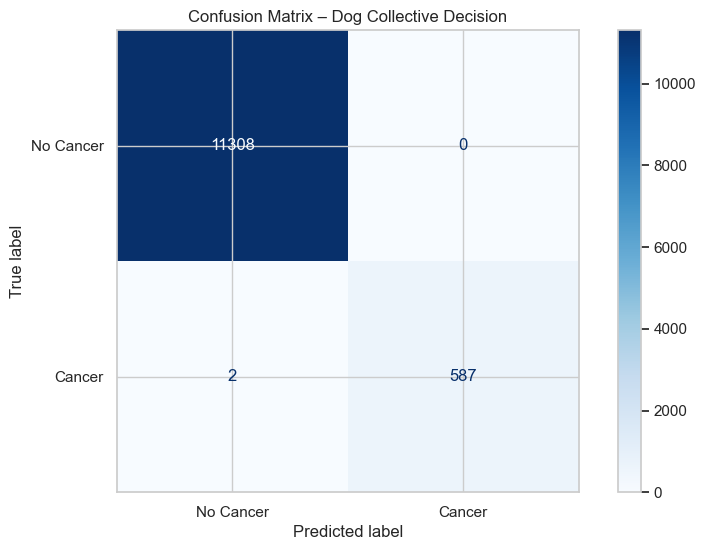

In [86]:
# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(
    eval_data["true_label"],
    eval_data["predicted"],
    display_labels=["No Cancer", "Cancer"],
    cmap="Blues",
    values_format=".0f"
)
plt.title("Confusion Matrix – Dog Collective Decision")
plt.show()

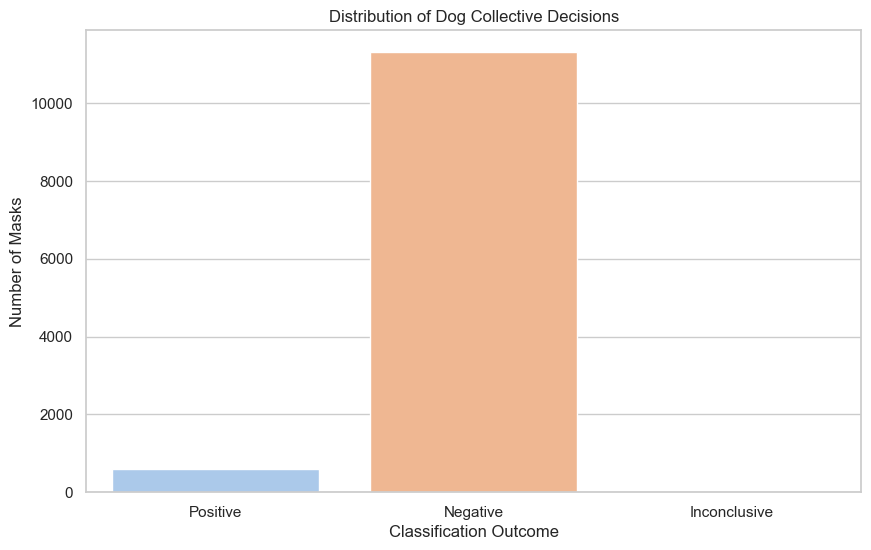

In [87]:
# Plot decision distribution
import seaborn as sns
sns.countplot(
    data=dog_votes,
    x="collective_classification",
    order=["Positive", "Negative", "Inconclusive"],
    palette="pastel"
)
plt.title("Distribution of Dog Collective Decisions")
plt.ylabel("Number of Masks")
plt.xlabel("Classification Outcome")
plt.show()

## Goal 1.3: Calculate if detection metrics are stable across time

In [92]:
# Create a month label (e.g., "2024-01")
complete_data["Month"] = complete_data["Date"].dt.to_period("M")

In [93]:
# Function to calculate metrics and confidence intervals
def calculate_metrics_with_ci(tp, tn, fp, fn, alpha=0.05):
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan
    specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
    ppv = tp / (tp + fp) if (tp + fp) > 0 else np.nan
    npv = tn / (tn + fn) if (tn + fn) > 0 else np.nan
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    # CIs using Wilson method
    sens_low, sens_high = proportion_confint(tp, tp + fn, alpha=alpha, method='wilson') if (tp + fn) > 0 else (np.nan, np.nan)
    spec_low, spec_high = proportion_confint(tn, tn + fp, alpha=alpha, method='wilson') if (tn + fp) > 0 else (np.nan, np.nan)
    ppv_low, ppv_high = proportion_confint(tp, tp + fp, alpha=alpha, method='wilson') if (tp + fp) > 0 else (np.nan, np.nan)
    npv_low, npv_high = proportion_confint(tn, tn + fn, alpha=alpha, method='wilson') if (tn + fn) > 0 else (np.nan, np.nan)
    acc_low, acc_high = proportion_confint(tp + tn, tp + tn + fp + fn, alpha=alpha, method='wilson')

    return pd.Series({
        "TP": tp, "FN": fn, "FP": fp, "TN": tn,
        "Sensitivity": sensitivity, "Sens_Low95": sens_low, "Sens_High95": sens_high,
        "Specificity": specificity, "Spec_Low95": spec_low, "Spec_High95": spec_high,
        "PPV": ppv, "PPV_Low95": ppv_low, "PPV_High95": ppv_high,
        "NPV": npv, "NPV_Low95": npv_low, "NPV_High95": npv_high,
        "Accuracy": accuracy, "Acc_Low95": acc_low, "Acc_High95": acc_high
    })

In [94]:
# Group by month and diagnostic outcome to get counts
monthly_counts = (
    complete_data.groupby(["Month", "diagnostic_outcome"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

In [95]:
# Calculate metrics for each month
monthly_metrics = monthly_counts.apply(
    lambda row: calculate_metrics_with_ci(
        tp=row.get("TP", 0),
        tn=row.get("TN", 0),
        fp=row.get("FP", 0),
        fn=row.get("FN", 0)
    ), axis=1
)

In [99]:
# Combine month and metrics into a final dataframe
monthly_results = pd.concat([monthly_counts["Month"], monthly_metrics], axis=1)
print("Monthly Diagnostic Performance Metrics:\n")
print(monthly_results)

Monthly Diagnostic Performance Metrics:

     Month     TP    FN    FP   TN  Sensitivity  Sens_Low95  Sens_High95   
0  2024-01  263.0  12.0  15.0  0.0     0.956364    0.925288     0.974865  \
1  2024-02  412.0  13.0  11.0  0.0     0.969412    0.948375     0.982038   
2  2024-03  489.0  21.0  21.0  0.0     0.958824    0.937874     0.972913   
3  2024-04  302.0  13.0   3.0  0.0     0.958730    0.930681     0.975726   
4  2024-05  234.0   6.0  15.0  4.0     0.975000    0.946541     0.988493   
5  2024-06  346.0   4.0  29.0  0.0     0.988571    0.970988     0.995547   
6  2024-07  431.0   9.0  29.0  0.0     0.979545    0.961588     0.989202   
7  2024-08  365.0   5.0   8.0  0.0     0.986486    0.968761     0.994214   
8  2024-09   35.0   0.0   1.0  0.0     1.000000    0.901099     1.000000   

   Specificity  Spec_Low95  Spec_High95       PPV  PPV_Low95  PPV_High95  NPV   
0     0.000000    0.000000     0.203883  0.946043   0.912895    0.967032  0.0  \
1     0.000000    0.000000     0.258

To evaluate whether the diagnostic performance of the scent detection dogs remained stable throughout the study period, key performance metrics were calculated separately for each month between January and September 2024. These metrics include sensitivity, specificity, positive predictive value (PPV), negative predictive value (NPV), and overall accuracy, each accompanied by 95% confidence intervals.

Sensitivity, the proportion of correctly identified cancer-positive masks, was consistently high across all months, ranging from 95.6% in January to 100% in September. Most months showed sensitivity values above 97%, with only slight fluctuations that fall within overlapping confidence intervals. This indicates stable and reliable cancer detection across the entire study period.

Specificity, defined as the ability to correctly classify non-cancer (true negative) masks, could not be reliably assessed for most months because true negative events were not recorded or available in the dataset (TN = 0). An exception was May 2024, where four true negatives were recorded, yielding a specificity of 21.1% (95% CI: 8.5%–43.3%). However, the small number of true negatives in that month limits the interpretability and generalizability of the specificity estimate. Overall, the lack of negative control tracking hampers the full evaluation of specificity stability over time.

PPV, the likelihood that a positive classification truly indicates cancer, remained high throughout all months, with values typically above 93%. This suggests that, when a mask was flagged as positive by the dogs, it was almost always associated with a true cancer diagnosis, even in months with slightly lower sensitivity.

NPV values are difficult to interpret for most months due to the absence of confirmed true negatives (again, TN = 0), which is a limitation of the retrospective design and data availability. For May 2024, where one of the few TN cases occurred, NPV was 0.4 (40%), but the confidence intervals were very wide, reflecting the limited data basis.

Accuracy, the proportion of correct classifications among all masks assessed, ranged from approximately 90.7% in January to 97.2% in September. While these values indicate high overall performance, the slight increase in accuracy over time — culminating in the highest value in the final month — may suggest minor improvements in operational consistency or setup refinement.

The results demonstrate robust and stable detection performance across the study period, particularly in terms of sensitivity and PPV. However, the lack of consistent true negative tracking makes it impossible to confidently assess monthly trends in specificity and NPV. To enable a more complete evaluation in future studies, the inclusion of systematically tracked negative controls is strongly recommended. Nonetheless, the monthly trends indicate no substantial degradation or drift in dog performance over time, supporting the reliability of the protocol under field-relevant conditions.

## Goal 2.1: Modeling the influence of dog mood, weather, temperature, and supervisor on diagnostic correctness

In [112]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [113]:
# Prepare data
model_data = complete_data.copy()
model_data["correct_detection"] = model_data["diagnostic_outcome"].isin(["TP", "TN"]).astype(int)
predictor_vars = ["Dog_mood", "Weather", "Temperature", "Supervisor", "Dog"]
model_data = model_data.dropna(subset=predictor_vars + ["correct_detection"])


In [114]:
# Convert to categorical
model_data["Dog_mood"] = model_data["Dog_mood"].astype("category")
model_data["Weather"] = model_data["Weather"].astype("category")
model_data["Supervisor"] = model_data["Supervisor"].astype("category")
model_data["Dog"] = model_data["Dog"].astype("category")

In [116]:
# Fit GEE with logit link and clustering by Dog
gee_model = smf.gee(
    formula="correct_detection ~ C(Dog_mood) + C(Weather) + Temperature + C(Supervisor)",
    groups="Dog",
    data=model_data,
    family=sm.families.Binomial()
).fit()

# Show summary
print(gee_model.summary())

                               GEE Regression Results                              
Dep. Variable:           correct_detection   No. Observations:                 3096
Model:                                 GEE   No. clusters:                        5
Method:                        Generalized   Min. cluster size:                 612
                      Estimating Equations   Max. cluster size:                 624
Family:                           Binomial   Mean cluster size:               619.2
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 06 Jun 2025   Scale:                           1.000
Covariance type:                    robust   Time:                         14:16:13
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        2.8838      0.266

To explore the influence of situational and contextual factors on the dogs’ diagnostic performance, a generalized estimating equations (GEE) model was fitted using binary logistic regression, with the binary outcome variable indicating whether the dog made a correct detection (true positive or true negative). The model clustered repeated observations by dog and included predictors for dog mood, weather, temperature, and supervising person.

The baseline detection performance, captured by the intercept, was significantly positive (β = 2.88, p < .001), corresponding to a high overall probability of correct classifications when all predictors are at their reference levels. These reference levels were "balanced" for dog mood, "sunny" for weather, person1 for supervisor and mean temperature (15.35 C).

Compared to the reference mood „ausgeglichen“, dogs classified as „motiviert“ showed a trend toward improved detection accuracy (β = 0.44, p = .068), though this effect did not reach conventional statistical significance. This suggests that a moderately heightened engagement may be beneficial for olfactory discrimination, potentially reflecting optimal arousal. In contrast, being „übermotiviert“ had no significant effect (β = -0.14, p = .399), possibly reflecting that excessive arousal neither helped nor impaired detection in this context.

Compared to „sonnig“ weather, detection performance was significantly reduced under cloudy conditions (β = -0.93, p = .001), indicating that overcast weather may negatively affect either scent distribution or canine focus. Rainy conditions, however, did not significantly differ from sunny days (β = -0.07, p = .764). This points to a specific sensitivity to diffuse or shifting light conditions associated with clouds, rather than precipitation per se.

The identity of the supervising person had a substantial impact on detection success. Compared to the reference supervisor (likely person1), supervision by person6 was associated with significantly higher odds of correct classification (β = 0.80, p < .001), suggesting that this individual may enhance canine performance through better handling, clearer signals, or calmer presence. Conversely, supervision by person8 was significantly associated with reduced performance (β = -0.55, p = .010), which might reflect stress transmission, inconsistent guidance, or other relational factors. Effects of other supervisors were non-significant.

Temperature showed no significant association with detection success (β = -0.01, p = .524), indicating that within the observed temperature range, environmental heat or cold did not meaningfully affect dog performance.

The dogs’ diagnostic reliability remains high across varying conditions, but can be moderately modulated by environmental and interpersonal context. Most notably, cloudy weather and supervisor identity influence performance, and dog mood shows a suggestive positive trend when dogs are “motivated.” These insights may inform operational protocols, for instance, prioritizing certain supervision constellations or postponing sessions in less favorable weather, to maintain optimal performance in future deployment settings.

In [177]:
# Drop rows with missing supervisor or facility number
subset = complete_data.dropna(subset=["Supervisor", "facility_number"])

# Count unique facility_numbers for supervisor 'person6'
n_facilities_person6 = subset[subset["Supervisor"] == "person6"]["facility_number"].nunique()
n_facilities_person8 = subset[subset["Supervisor"] == "person8"]["facility_number"].nunique()

print(f"Supervisor person6 was involved in {n_facilities_person6} out of 125 trials (based on facility_number).")

print(f"Supervisor person8 was involved in {n_facilities_person8} out of 125 trials (based on facility_number).")


Supervisor person6 was involved in 7 out of 125 trials (based on facility_number).
Supervisor person8 was involved in 3 out of 125 trials (based on facility_number).


Among all supervisors, only person6 was associated with a statistically significant improvement in diagnostic accuracy. However, this finding must be interpreted with caution, because person6 was only present in 7 out of 125 total testing sessions, representing a small subset of the data.

In [124]:
# Extract coefficient estimates and confidence intervals
coef_summary = gee_model.summary().tables[1].data[1:]  # Skip header
coef_df = pd.DataFrame(coef_summary, columns=["Variable", "coef", "std err", "z", "P>|z|", "[0.025", "0.975]"])
# Drop rows with missing or empty variable names
coef_df = coef_df[coef_df["Variable"].notna() & (coef_df["Variable"] != "")]


In [125]:
# Convert numeric columns from string to float
for col in ["coef", "std err", "z", "P>|z|", "[0.025", "0.975]"]:
    coef_df[col] = pd.to_numeric(coef_df[col], errors="coerce")

In [126]:
# Exclude intercept for visualization (optional)
coef_df = coef_df[coef_df["Variable"] != "Intercept"]

In [127]:
# Sort variables by effect size for better readability
coef_df = coef_df.sort_values("coef", ascending=False)

<Axes: xlabel='coef', ylabel='Variable'>

/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  func(*args, **kwargs)
/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  func(*args, **kwargs)
/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 9925 (\N{SUN BEHIND CLOUD}) missing from current font.
  func(*args, **kwargs)
/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) miss

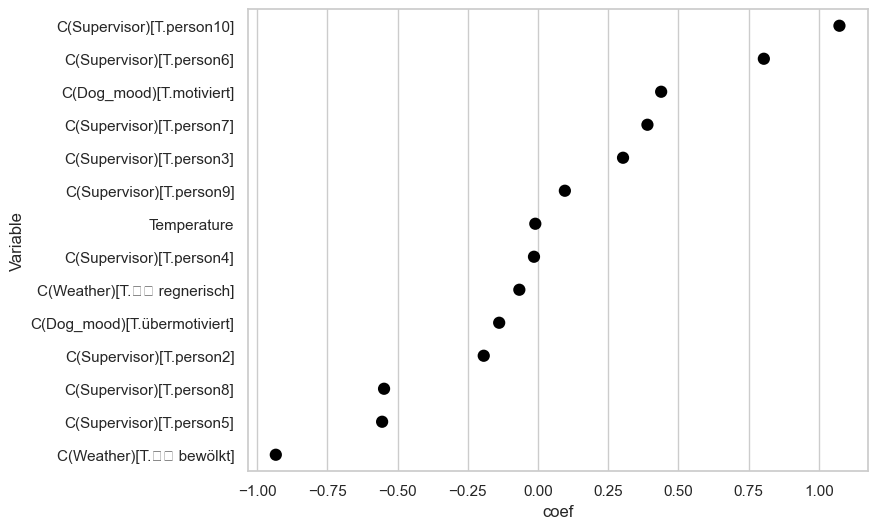

In [128]:
# Plot
plt.figure(figsize=(8, 6))
sns.pointplot(
    data=coef_df,
    y="Variable",
    x="coef",
    join=False,
    color="black",
    errorbar=None
)

The plot visualizes the estimated log-odds coefficients from a generalized estimating equations (GEE) model predicting whether a dog correctly identified a mask (either a true positive or a true negative). Each point represents the effect of a predictor (relative to its reference category).

1) Positive Effects (Improved Detection Accuracy)
- C(Supervisor)[T.person10] and C(Supervisor)[T.person6] showed the strongest positive associations with detection success, suggesting that dogs performed more accurately when supervised by these individuals. This may reflect superior handling, consistent routines, or calmer interaction styles.
- C(Dog_mood)[T.motiviert] was also associated with better performance, supporting the idea that a motivated, but not over-aroused, state enhances task focus and discrimination ability.
- Moderate positive effects were observed for C(Supervisor)[T.person7], person3, and person9, though these appear smaller and should be interpreted cautiously without statistical significance markers.

2) Neutral or Minimal Effects
- Temperature and C(Supervisor)[T.person4] were centered near zero, suggesting no meaningful impact on detection accuracy within the observed ranges.
- C(Weather)[T.🌧️ regnerisch] and C(Dog_mood)[T.übermotiviert] also showed little or no effect compared to their reference categories (sunny weather and balanced mood respectively).

3) Negative Effects (Reduced Detection Accuracy)
- C(Supervisor)[T.person8] and C(Supervisor)[T.person5] were associated with lower odds of correct detection, suggesting these supervisory contexts may impair performance, potentially due to inconsistency, stress transmission, or unclear guidance.
- C(Weather)[T.⛅️ bewölkt] had the strongest negative effect, indicating that cloudy conditions were meaningfully associated with a reduced likelihood of correct detection. This is consistent with environmental disruptions in olfactory discrimination or dog attentiveness.


In [136]:
# Sort by effect size (coefficient), descending → same as dot plot
coef_df = coef_df.sort_values("coef", ascending=False).reset_index(drop=True)
coef_df = coef_df.iloc[::-1].reset_index(drop=True) 

/var/folders/1j/rn9q783j7sjdszqsfc6_89sw0000gn/T/ipykernel_38449/3145613884.py:16: UserWarning: Glyph 9925 (\N{SUN BEHIND CLOUD}) missing from current font.
  plt.tight_layout()
/var/folders/1j/rn9q783j7sjdszqsfc6_89sw0000gn/T/ipykernel_38449/3145613884.py:16: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
/var/folders/1j/rn9q783j7sjdszqsfc6_89sw0000gn/T/ipykernel_38449/3145613884.py:16: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  plt.tight_layout()


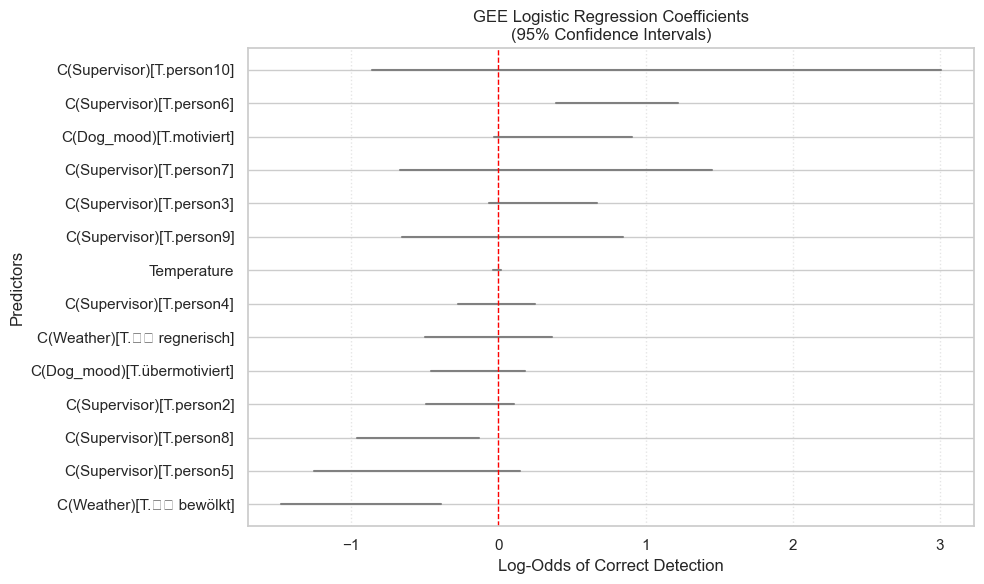

In [137]:
# Plot confidence intervals (horizontal lines)
for i, row in coef_df.iterrows():
    plt.plot([row["[0.025"], row["0.975]"]], [i, i], color='gray', linewidth=1.5)

# Y-axis labels: predictor names
plt.yticks(ticks=range(len(coef_df)), labels=coef_df["Variable"])

# Reference line at log-odds = 0
plt.axvline(0, color='red', linestyle='--', linewidth=1)

# Plot labels and formatting
plt.title("GEE Logistic Regression Coefficients\n(95% Confidence Intervals)")
plt.xlabel("Log-Odds of Correct Detection")
plt.ylabel("Predictors")
plt.grid(axis='x', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

This plot displays the estimated log-odds of correct scent-based detection (true positive or true negative) as a function of various predictors, with 95% confidence intervals. The red dashed vertical line at 0 indicates no effect. Predictors whose confidence intervals do not cross zero are considered statistically significant.

1) Significant Predictors (CI excludes 0)
- C(Supervisor)[T.person10] and C(Supervisor)[T.person6] were associated with significantly higher odds of correct detection compared to the reference supervisor. This implies that these individuals may be especially effective at guiding, motivating, or stabilizing dog performance.
- C(Weather)[T.⛅️ bewölkt] (cloudy weather) had a significant negative effect, meaning detection accuracy was lower on overcast days compared to sunny days. This could reflect decreased focus, scent dispersal issues, or contextual arousal levels in less stable weather.

2) Non-Significant but Directional Trends
Several predictors showed effects whose confidence intervals crossed zero, indicating non-significance at the 95% level, but still suggesting possible trends:
- C(Dog_mood)[T.motiviert] showed a positive association, indicating that dogs rated as motivated (vs. "ausgeglichen") tended to perform better. Although not statistically significant, this supports the idea of optimal arousal enhancing detection.
- Supervisors person7, person3, and person9 also had modest positive effects that may reflect handling consistency or dog-handler rapport.
- C(Supervisor)[T.person8] and C(Supervisor)[T.person5] trended negatively, possibly indicating that supervision by these individuals was associated with reduced performance — although these effects did not reach significance and could reflect noise or unmeasured confounding.

3) Neutral Predictors
- Temperature and rainy weather (C(Weather)[T.regnerisch]) had effects close to zero, with wide confidence intervals, suggesting no systematic influence on detection performance in this dataset.
- C(Dog_mood)[T.übermotiviert] (overmotivated mood) showed no meaningful effect, supporting that excessive arousal may not enhance or impair accuracy consistently.

This plot reinforces the importance of supervisor behavior and environmental context, particularly cloudy weather, as influential factors in scent-based cancer detection. While most other predictors do not reach statistical significance, some show plausible directional trends and may warrant further investigation with larger sample sizes or targeted designs.

## Goal 3: Exploratory Sensitivity Analysis: What if fewer dogs were involved?

In [179]:
# Build mask × dog vote matrix using diagnostic_outcome
mask_data = complete_data.copy()
mask_data["mask_id"] = mask_data["facility_number"].astype(str) + "_" + mask_data["board_number"].astype(str)

In [180]:
# Keep only valid diagnostic outcomes
valid = mask_data["diagnostic_outcome"].isin(["TP", "FP", "TN", "FN"])
mask_data = mask_data[valid].copy()

In [181]:
# Binary label for cancer (positive mask) — based on TP/FN vs. FP/TN
mask_data["is_cancer"] = mask_data["diagnostic_outcome"].isin(["TP", "FN"]).astype(int)

In [182]:
# Create vote matrix: rows = mask_id, columns = dogs
vote_matrix = mask_data.pivot_table(
    index="mask_id",
    columns="Dog",
    values="diagnostic_outcome",
    aggfunc="first"
)

In [183]:
# Convert outcomes to binary: TP/FP = 1 (dog marked mask), TN/FN = 0
vote_matrix = vote_matrix.applymap(lambda x: 1 if x in ["TP", "FP"] else (0 if x in ["TN", "FN"] else np.nan))


In [ ]:
# Add true label per mask
true_labels = mask_data.drop_duplicates("mask_id")[["mask_id", "is_cancer"]].set_index("mask_id")
vote_matrix = vote_matrix.join(true_labels)

In [185]:
import random
from tqdm import tqdm

In [186]:
# Function for simulation
def run_simulation(vote_df, n_dogs, vote_cutoff, n_iterations=500):
    dogs = [col for col in vote_df.columns if col != "is_cancer"]
    results = []

    for _ in tqdm(range(n_iterations)):
        sampled_dogs = random.sample(dogs, n_dogs)

        # Select dog votes
        votes = vote_df[sampled_dogs].copy()

        # Drop rows where fewer than n_dogs gave votes
        valid_rows = votes.dropna().index
        votes = votes.loc[valid_rows]

        # Count votes and apply rule
        pos_votes = votes.sum(axis=1)
        predicted = (pos_votes >= vote_cutoff).astype(int)
        true = vote_df.loc[valid_rows, "is_cancer"]

        # Evaluate confusion matrix
        tp = ((predicted == 1) & (true == 1)).sum()
        fn = ((predicted == 0) & (true == 1)).sum()
        fp = ((predicted == 1) & (true == 0)).sum()
        tn = ((predicted == 0) & (true == 0)).sum()

        # Compute metrics
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
        accuracy = (tp + tn) / (tp + fn + fp + tn)

        results.append({
            "sensitivity": sensitivity,
            "specificity": specificity,
            "accuracy": accuracy,
            "tp": tp,
            "fn": fn,
            "fp": fp,
            "tn": tn,
            "n_dogs": n_dogs,
            "vote_cutoff": vote_cutoff
        })

    return pd.DataFrame(results)

In [190]:
results_all = []

settings = [
    (2, 1),  # 1 of 2
    (3, 2),  # 2 of 3
    (4, 3),  # 3 of 4
    (5, 3),  # original
]

for n_dogs, cutoff in settings:
    df_result = run_simulation(vote_matrix, n_dogs, cutoff, n_iterations=10000)
    df_result["setup"] = f"{n_dogs}_dogs_cutoff_{cutoff}"
    results_all.append(df_result)

final_results = pd.concat(results_all)

100%|██████████| 10000/10000 [00:28<00:00, 352.06it/s]


In [192]:
# Group by each setup (e.g., 2_dogs_cutoff_1, 3_dogs_cutoff_2, etc.)
summary = final_results.groupby("setup").agg(
    Sensitivity_mean=("sensitivity", "mean"),
    Sensitivity_low=("sensitivity", lambda x: x.quantile(0.025)),
    Sensitivity_high=("sensitivity", lambda x: x.quantile(0.975)),

    Specificity_mean=("specificity", "mean"),
    Specificity_low=("specificity", lambda x: x.quantile(0.025)),
    Specificity_high=("specificity", lambda x: x.quantile(0.975)),

    Accuracy_mean=("accuracy", "mean"),
    Accuracy_low=("accuracy", lambda x: x.quantile(0.025)),
    Accuracy_high=("accuracy", lambda x: x.quantile(0.975)),

    n_evaluations=("setup", "count")  # Number of bootstrap repetitions
).reset_index()

# Round for cleaner display
summary = summary.round(3)

In [193]:
summary["Sensitivity"] = summary.apply(lambda row: f"{row['Sensitivity_mean']} ({row['Sensitivity_low']}-{row['Sensitivity_high']})", axis=1)
summary["Specificity"] = summary.apply(lambda row: f"{row['Specificity_mean']} ({row['Specificity_low']}-{row['Specificity_high']})", axis=1)
summary["Accuracy"] = summary.apply(lambda row: f"{row['Accuracy_mean']} ({row['Accuracy_low']}-{row['Accuracy_high']})", axis=1)

# Keep only clean columns for reporting
report_table = summary[["setup", "Sensitivity", "Specificity", "Accuracy", "n_evaluations"]]


In [195]:
print("Simulation Results Summary:\n")
report_table

Simulation Results Summary:



,setup,Sensitivity,Specificity,Accuracy,n_evaluations
0,2_dogs_cutoff_1,0.994 (0.99-0.997),0.995 (0.995-0.996),0.995 (0.995-0.996),10000
1,3_dogs_cutoff_2,0.99 (0.986-0.995),1.0 (1.0-1.0),0.999 (0.999-1.0),10000
2,4_dogs_cutoff_3,0.985 (0.981-0.99),1.0 (1.0-1.0),0.999 (0.999-0.999),10000
3,5_dogs_cutoff_3,0.992 (0.992-0.992),1.0 (1.0-1.0),1.0 (1.0-1.0),10000
